# CSE485 Final Exam Spring 2019

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Q1 20pts)  The fictional twit_data.csv shows number of tweets during rainy and sunny days.


a) Compare the mean and std deviation? Is there any difference, state if one is higher?

b) Is the difference significant?

(Use only python syntax, numpy, stats, sklearn libs)


In [125]:
a= pd.read_csv("twit_data.csv",usecols=[1,2])
a

,sunny,rainy
0,100195.726705,100004.489353
1,76001.863981,121380.569909
2,91084.722352,107663.783156
3,101501.493382,106033.323308
4,73462.650575,126159.506624
5,69613.164654,106144.883514
6,86594.148680,113905.726370
7,105151.616424,103481.146639
8,84681.280422,136673.606272
9,66891.547876,121776.605269


In [13]:
#Q1a)
a.describe() #a.mean(),a.std()

,Unnamed: 0,sunny,rainy
count,20.00000,20.000000,20.000000
mean,9.50000,95082.631626,113845.168368
std,5.91608,18303.300281,17295.566400
min,0.00000,66891.547876,74611.040735
25%,4.75000,82805.032229,103443.411262
50%,9.50000,92682.561532,111399.945104
75%,14.25000,105599.521073,122872.330608
max,19.00000,128201.122755,156822.751257


In [ ]:
#Q1b)result: rainy days are higher than sunny days.

In [127]:
x= pd.read_csv("twit_data.csv",usecols=[1])
y= pd.read_csv("twit_data.csv",usecols=[2])

print(stats.sem(x))
print(stats.sem(y))

print(stats.shapiro(x))
print(stats.shapiro(y))
print(stats.ttest_ind(x, y, equal_var=True))

[4092.74236418]
[3867.40621802]
(0.9615886807441711, 0.5760543346405029)
(0.9591495394706726, 0.5270016193389893)
Ttest_indResult(statistic=array([-3.33204946]), pvalue=array([0.00192913]))


 ### Q2 30pts) The list below shows USD-TRY price for 10 Days in May 2019. Each data point represent 1 day. Can you guess the price for the next day?
    
usd_try =[5.9699,5.969,6.01457,6.14617,6.18786,6.23897,6.29057,6.31666,6.3363,6.32544]

a) plot the points as blue dots.

b) Using sklearn  fit a regression model to this data. 
   print the coefficients or parameters of the fitted model. How good is the fit?

c) plot the fitted curve with red squares connected by line. '-rs'

d) predict the price for the next (11th and 12th) days. ( 0 based index!). 

e) Plot the 11th day and 12th price on the same plot with a 'g*'. 

In [159]:
a=[1,2,3,4,5,6,7,8,9,10]
b =[5.9699,5.969,6.01457,6.14617,6.18786,6.23897,6.29057,6.31666,6.3363,6.32544]

c =pd.Series(data = b ,index = a)
c

1     5.96990
2     5.96900
3     6.01457
4     6.14617
5     6.18786
6     6.23897
7     6.29057
8     6.31666
9     6.33630
10    6.32544
dtype: float64

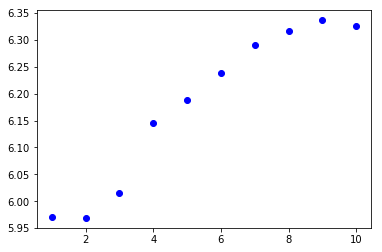

In [160]:
#Q2 a)
plt.plot(a,b,'ro',color="blue")

In [164]:
#Q2 b) 
b_b = np.c_[np.ones((10, 1)), b]
print(b_b.shape)
theta_best = np.linalg.inv(b_b.T.dot(b_b)).dot(b_b.T).dot(a)
print("Best Theta thetha0, thetha1: ", theta_best)

(10, 2)
Best Theta thetha0, thetha1:  [-116.17750724   19.69036991]


In [163]:
b_new = np.array([[0], [2]])
b_new_b = np.c_[np.ones((2, 1)), b_new] # add x0 = 1 to each instance

a_predict = b_new_b.dot(theta_best)
a_predict

theta_best_svd, residuals, rank, s = np.linalg.lstsq(b_b, y, rcond=1e-6) ## least squares approximation
print(theta_best)

LinAlgError: Incompatible dimensions

In [151]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X , y)

y_new = lin_reg.predict(X_new)

ValueError: Expected 2D array, got 1D array instead:
array=[5.9699  5.969   6.01457 6.14617 6.18786 6.23897 6.29057 6.31666 6.3363
 6.32544].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [132]:
X = X.reshape(1, -1)

In [91]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_new = lin_reg.predict(X_new)

TypeError: fit() missing 1 required positional argument: 'y'

In [6]:
#Q2 c)

In [7]:
#Q2 d)

In [8]:
#Q2 e) Replot the previous curves and then Plot the 11th day and 12th price on the same plot with a 'g*'. 

 ### Q3 20pts) DIMENSION REDUCTION

    Wine dataset in sklearn a three class dataset
    

a) load the data

b) apply pca to reduce the dimension to 2. (Works better if you do standardscaler before applying pca.)


c) scatter plot data points, colors indicate classes.


d) run k-means clustering with 3 centers on reduced data. 


e) Plot cluster centers on scatter plot with large + symbols.(markersize)



In [152]:
#Q3 a) 
from sklearn.datasets import load_wine
digits = load_wine()
print(digits) 

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [153]:
#Q3 b) 
X = digits.data
n_features = X.shape[1]
y = digits.target
target_names = digits.target_names
n_classes = target_names.shape[0]
print(X[:,1]) 

[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.73
 1.87 1.81 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  1.81 2.05 1.77 1.72
 1.9  1.68 1.5  1.66 1.83 1.53 1.8  1.81 1.64 1.65 1.5  3.99 1.71 3.84
 1.89 3.98 1.77 4.04 3.59 1.68 2.02 1.73 1.73 1.65 1.75 1.9  1.67 1.73
 1.7  1.97 1.43 0.94 1.1  1.36 1.25 1.13 1.45 1.21 1.01 1.17 0.94 1.19
 1.61 1.51 1.66 1.67 1.09 1.88 0.9  2.89 0.99 3.87 0.92 1.81 1.13 3.86
 0.89 0.98 1.61 1.67 2.06 1.33 1.83 1.51 1.53 2.83 1.99 1.52 2.12 1.41
 1.07 3.17 2.08 1.34 2.45 1.72 1.73 2.55 1.73 1.75 1.29 1.35 3.74 2.43
 2.68 0.74 1.39 1.51 1.47 1.61 3.43 3.43 2.4  2.05 4.43 5.8  4.31 2.16
 1.53 2.13 1.63 4.3  1.35 2.99 2.31 3.55 1.24 2.46 4.72 5.51 3.59 2.96
 2.81 2.56 3.17 4.95 3.88 3.57 5.04 4.61 3.24 3.9  3.12 2.67 1.9  3.3
 1.29 5.19 4.12 3.03 1.68 1.67 3.83 3.26 3.27 3.45 2.76 4.36 3.7  3.37
 2.58 4.6  3.03 2.39 2.51 5.65 3.91 4.28 2.59 4.1 ]


In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [155]:
print(pca.components_)

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]


In [156]:
pca.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [157]:
#Q3 c) 
digits.data.shape

(178, 13)

In [158]:
pca = PCA(2)  # project from 64 to 2 dimensions        
projected = pca.fit_transform(digits.data)
print(digits.data.shape)        
print(projected.shape)

(178, 13)
(178, 2)


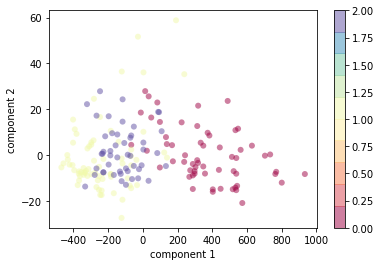

In [105]:
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [106]:
#Q3 d) 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [107]:
centers = kmeans.cluster_centers_
print(centers)

[[1.38600000e+01 1.79391304e+00 2.50695652e+00 1.70739130e+01
  1.06000000e+02 2.94304348e+00 3.11086957e+00 2.98695652e-01
  1.92608696e+00 6.26000000e+00 1.10000000e+00 3.03565217e+00
  1.33856522e+03]
 [1.25042424e+01 2.44318182e+00 2.28378788e+00 2.07772727e+01
  9.24696970e+01 2.07333333e+00 1.79545455e+00 3.84696970e-01
  1.47181818e+00 4.07242423e+00 9.46212121e-01 2.50484848e+00
  4.52545455e+02]
 [1.29328070e+01 2.66192982e+00 2.40315789e+00 1.99807018e+01
  1.01842105e+02 2.04912281e+00 1.46315789e+00 4.01929825e-01
  1.43350877e+00 5.75333333e+00 8.65087719e-01 2.29631579e+00
  6.97087719e+02]
 [1.35275000e+01 1.92593750e+00 2.37093750e+00 1.77250000e+01
  1.06500000e+02 2.72500000e+00 2.74250000e+00 2.88750000e-01
  1.87593750e+00 4.98875000e+00 1.04268750e+00 3.08906250e+00
  1.01743750e+03]]


In [108]:
print(X[0])
print(y_kmeans)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[3 3 0 0 2 0 0 0 3 3 0 0 0 3 0 0 0 3 0 2 2 2 3 3 2 2 0 0 3 3 0 0 3 0 3 3 3
 3 3 2 2 3 3 2 3 3 3 3 3 0 3 0 0 0 3 3 3 0 0 1 2 1 2 1 1 2 1 1 2 2 3 1 1 3
 3 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 3 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 2 1 2 2 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 3 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


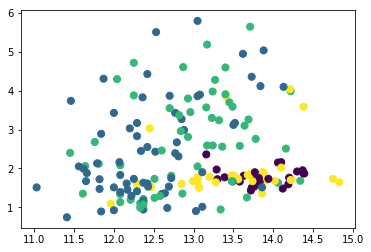

In [109]:
#Q3 e) 
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

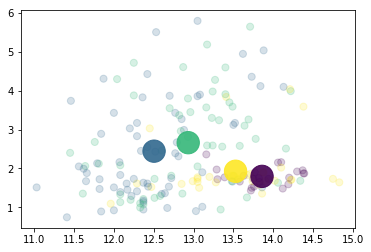

In [110]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50,alpha=0.2, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c=[0,1,2,3], s=500, alpha= 0.9, cmap='viridis')

 ### Q4 (30pts) CLASSIFICATION
 
  Run KNN classification on wine data. (Standard scaled data results better) 
  
  a) split the data into 70%, 30%. 
  
  b) train and test a KNN classifier. choose parametes as you wish.
  
  c) print test classification score/report
  
  d) print confusion matrix. Which is the most confused class? 

In [111]:
print(X.shape)
print(y)

(178, 13)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train", X_train.shape)
print("test", X_test.shape)

train (142, 13)
test (36, 13)


In [113]:
from sklearn.linear_model import LogisticRegression
bin_logreg_model = LogisticRegression()
bin_logreg_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
ypred = knn.predict(X)
print("pred",ypred)
yprob = knn.predict_proba(X)
print("prob",yprob)

pred [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 1 1 2 0 0 1 1 0
 0 1 1 2 0 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 0 2 1 2
 2 2 2 1 1 1 2 2 1 0 2 2 2 1 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2]
prob [[1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.2 0.2 0.6]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.4 0.  0.6]
 [0.8 0.2 0. ]
 [0.2 0.2 0.6]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.4 0.  0.6]
 [0.4 0.  0.6]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.8 0.2 0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.6 0.2 0.2]
 [0.4 0.4 0.2]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.4 0.4 0.2]
 [0.8 0.  0.2]
 [1.  0.  0. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)
model.fit(X_train, y_train)
yprob = model.predict_proba(X_train)
ypred = model.predict(X_train)
from sklearn.linear_model import LogisticRegression
bin_logreg_model = LogisticRegression()
bin_logreg_model.fit(X_train, y_train)
y_train_pred = bin_logreg_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

In [166]:
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
#Q4 a) 

In [15]:
#Q4 b) 

In [16]:
#Q4 c) 

In [17]:
#Q4 d)
tpos = np.count_nonzero(land(ypred == 1, y==1))
tneg = np.count_nonzero(land(ypred == 0, y==0)) 
fneg = np.count_nonzero(land(ypred == 0, y==0))
fpos = np.count_nonzero(land(ypred ==1, y==0)) 

conf_mat= np.array([[tneg,fneg],[fpos, tpos]])
print(conf_mat)